# New Risk Monitor – Exploración GDELT
Este notebook sirve para hacer analisis exploratorio de los archivos CSV de entrada.  

NOTA: Antes de ejecutar, favor de correr el requirements.txt que se encuentra en este mismo folder.

In [1]:
import os
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

from pathlib import Path
from dotenv  import load_dotenv

pd.set_option("display.max_columns", 50)
REPO_ROOT = Path(".").resolve()

load_dotenv()


c:\Users\evilSystem\anaconda3\envs\BSG_Ins\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


True

## 0) Definición de columnas para Events
El CSV de Events viene sin columnas pero lo siguiente define el nombre de cada una de ellas (58 columnas en total)

In [2]:
eventsColumns = ["GlobalEventID","SQLDATE","MonthYear","Year","FractionDate",
                 "Actor1Code","Actor1Name","Actor1CountryCode","Actor1KnownGroupCode","Actor1EthnicCode","Actor1Religion1Code","Actor1Religion2Code","Actor1Type1Code","Actor1Type2Code","Actor1Type3Code",
                 "Actor2Code","Actor2Name","Actor2CountryCode","Actor2KnownGroupCode","Actor2EthnicCode","Actor2Religion1Code","Actor2Religion2Code","Actor2Type1Code","Actor2Type2Code","Actor2Type3Code",
                 "IsRootEvent","EventCode","EventBaseCode","EventRootCode","QuadClass","GoldsteinScale","NumMentions","NumSources","NumArticles","AvgTone",
                 "Actor1Geo_Type","Actor1Geo_Fullname","Actor1Geo_CountryCode","Actor1Geo_ADM1Code","Actor1Geo_ADM2Code","Actor1Geo_Lat","Actor1Geo_Long","Actor1Geo_FeatureID",
                 "Actor2Geo_Type","Actor2Geo_Fullname","Actor2Geo_CountryCode","Actor2Geo_ADM1Code","Actor2Geo_ADM2Code","Actor2Geo_Lat","Actor2Geo_Long","Actor2Geo_FeatureID",
                 "ActionGeo_Type","ActionGeo_Fullname","ActionGeo_CountryCode","ActionGeo_ADM1Code","ActionGeo_Lat","ActionGeo_Long","DateAdded","SourceURL"]


## 1) Cargar datos
- Cargar los **CSV** que residen dentro de las carpetas Input de este repositorio.

In [3]:
# Configurar estas variables para escoger el path y archivo que gustes
ingestionDate         = "2026-01-24"
inputFile_events      = os.getenv("LOCAL_INPUT_DIR") + f"/landing/events/ingestion_date={ingestionDate}/"         + f"gdelt_event_{ingestionDate.replace('-', '')}.csv"
inputFile_countryRisk = os.getenv("LOCAL_INPUT_DIR") + f"/reference/country_risk/ingestion_date={ingestionDate}/" + f"gdelt_country_risk_{ingestionDate.replace('-', '')}.csv"
df_events             = None
df_countryRisk        = None

if os.path.exists(inputFile_events) and os.path.exists(inputFile_countryRisk):
    df_events      = pd.read_csv(inputFile_events, sep='\t', names = eventsColumns)
    df_countryRisk = pd.read_csv(inputFile_countryRisk)

    print("--------------------------------------------------------------------------------------------------------------")
    print("Loaded Events CSV: ", inputFile_events, "\nrows:", len(df_events))
    print("--------------------------------------------------------------------------------------------------------------")
    print("Loaded Country Risk CSV: ", inputFile_events, "\nrows:", len(df_countryRisk))
    print("--------------------------------------------------------------------------------------------------------------")

else:
    print("ERROR al cargar alguos de los CSVs, por favor verifica los paths o nombres de archivos!!!!")


--------------------------------------------------------------------------------------------------------------
Loaded Events CSV:  ../data/input/landing/events/ingestion_date=2026-01-24/gdelt_event_20260124.csv 
rows: 150
--------------------------------------------------------------------------------------------------------------
Loaded Country Risk CSV:  ../data/input/landing/events/ingestion_date=2026-01-24/gdelt_event_20260124.csv 
rows: 9
--------------------------------------------------------------------------------------------------------------


## 2) Chequeo superficial de ambos DataFrames

In [4]:

print("--------------------------------------------------------------------------------------------------------------")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%- EVENTS -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(df_events.describe(include="all"))
print(df_events.head())
print("--------------------------------------------------------------------------------------------------------------")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%- COUNTRY RISK -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(df_countryRisk.describe(include="all"))
print(df_countryRisk.head())
print("--------------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%- EVENTS -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        GlobalEventID     SQLDATE  MonthYear    Year  FractionDate Actor1Code  \
count    1.500000e+02       150.0      150.0   150.0  1.500000e+02        150   
unique            NaN         NaN        NaN     NaN           NaN          9   
top               NaN         NaN        NaN     NaN           NaN      CIVIR   
freq              NaN         NaN        NaN     NaN           NaN         35   
mean     2.000076e+06  20260124.0   202601.0  2026.0  2.026066e+03        NaN   
std      4.344537e+01         0.0        0.0     0.0  1.825083e-12        NaN   
min      2.000001e+06  20260124.0   202601.0  2026.0  2.026066e+03        NaN   
25%      2.000038e+06  20260124.0   202601.0  2026.0  2.026066e+03        NaN   
50%      2.000076e+06  20260124.0   202601.0  202

## 3) Chequeo rápido de valores nulos

In [5]:

# Nulos por columna
print("--------------------------------------------------------------------------------------------------------------")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%- EVENTS -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(df_events.isna().sum().sort_values(ascending = False))
print("--------------------------------------------------------------------------------------------------------------")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%- COUNTRY RISK -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(df_countryRisk.isna().sum().sort_values(ascending = False))
print("--------------------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%- EVENTS -%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Actor1KnownGroupCode     150
Actor1Religion1Code      150
Actor1EthnicCode         150
Actor2EthnicCode         150
Actor2Religion1Code      150
Actor2Religion2Code      150
Actor2Type2Code          150
Actor2KnownGroupCode     150
Actor1Type3Code          150
Actor1Type2Code          150
Actor1Religion2Code      150
Actor2Type3Code          150
SourceURL                150
Actor2Geo_ADM2Code       150
Actor1Geo_ADM2Code       150
Year                       0
FractionDate               0
Actor1Code                 0
Actor1Name                 0
Actor1CountryCode          0
Actor2Name                 0
Actor2Code                 0
Actor1Type1Code            0
Actor2CountryCode          0
GlobalEventID              0
SQLDATE                    0
MonthYear               

## 4) Gráficos para representar DataFrames
- Events Data Frame


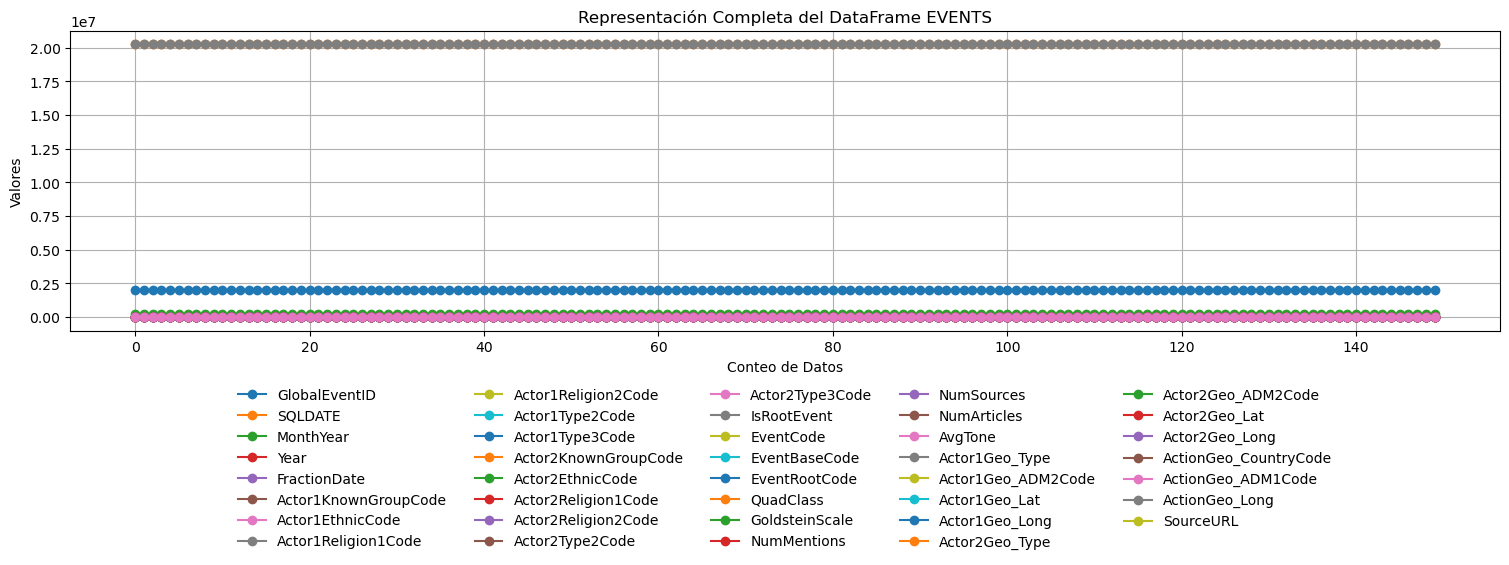

In [6]:
df_events.plot(kind='line', marker='o', figsize=(15, 6))

plt.title('Representación Completa del DataFrame EVENTS')
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), ncol = 5, frameon = False)
plt.tight_layout()
plt.xlabel('Conteo de Datos')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

- Country Risk Data Frame

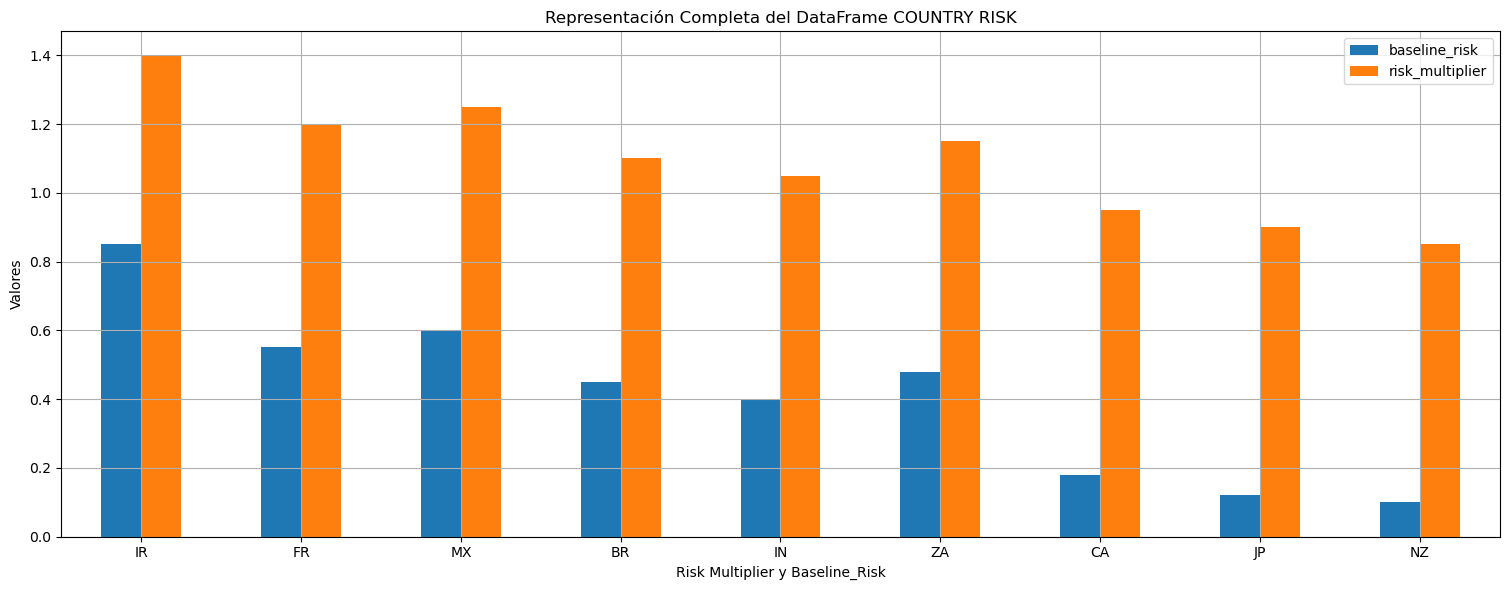

In [7]:
df_countryRisk.plot(kind='bar', figsize=(15, 6),x='country')

plt.title('Representación Completa del DataFrame COUNTRY RISK')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.xlabel('Risk Multiplier y Baseline_Risk')
plt.ylabel('Valores')
plt.grid(True)
plt.show()